In [73]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB


In [86]:
#filename = os.path.join('c:' + os.sep, 'Users', 'AMAN KHEDEKAR', 'Desktop',  'diabetes.csv')
#dataset = load_csv(filename)
df = pd.read_csv('C:\PimaID.csv')#,sep=","";"" ")
df = df.dropna()
df.isna().any()
#print(df)
df[ 'BMI']=(df[ 'BMI']).astype(float)
df['Glucose']=(df[ 'Glucose']).astype(float)
df['Pregnancies']=(df[ 'Pregnancies']).astype(float)
df['BloodPressure']=(df[ 'BloodPressure']).astype(float)
#df['SkinThickness']=(df[ 'SkinThickness']).astype(float)
df['Insulin']=(df[ 'Insulin']).astype(float)
#df['DiabetesPedigreeFunction']=(df[ 'DiabetesPedigreeFunction']).astype(float)
df['Age']=(df[ 'Age']).astype(float)

#print(df['DiabetesPedigreeFunction'])

#df = df[df['Outcome']=='1']
#Counter(df['Outcome'])
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


In [87]:
pre_y = df['Outcome']
pre_x = df.drop('Outcome', axis=1)
dm_y = pre_y
#print(dm_y)
dm_x = pre_x
#print(dm_x)
pre_y.shape
all_dm_col = dm_x.columns
#dm_x.to_excel('1.xlsx')
#print(pre_y.shape)
dm_x.columns
#import pickle
#import joblib
#filename = 'allcol.pkl'
#joblib.dump(all_dm_col, filename)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age'], dtype='object')

In [102]:
smote = SMOTE()
Xl, y = smote.fit_sample(dm_x,dm_y)
#print(Xl, y)
counter = Counter(y)
#print(counter)
sc = MinMaxScaler()
X = sc.fit(Xl)
import pickle
import joblib
filename = 'scalers1.pkl'
joblib.dump(X, filename)
X = sc.transform(Xl)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,  shuffle=True)


In [90]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(priors=None)
classifier.fit(x_train,y_train)
print(classifier)

#input_dim = x_test.reshape(200,8)
#input_dim = x_test.reshape(200,8)
#print(input_dim)
y_expect = y_test
y_pred = classifier.predict(x_test)
score = accuracy_score(y_expect, y_pred)
print (score*100)


GaussianNB()
77.0


In [91]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.22)

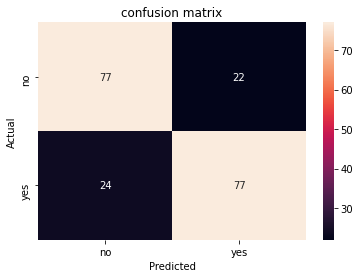

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['no','yes']); ax.yaxis.set_ticklabels(['no','yes']);

In [93]:
import pickle
import joblib
from joblib import dump, load

filename = 'Pickle_Prediction_Model.pkl'
joblib.dump(classifier,filename)

['Pickle_Prediction_Model.pkl']

In [108]:
data={
 'Pregnancies': 4,
 'Glucose': 110,
 'BloodPressure': 92,
# 'SkinThickness':45,
 'Insulin':0,
 'BMI': 37.6,
# 'DiabetesPedigreeFunction': 0.158,
 'Age':30,
        
}

In [109]:
unit = np.array(list(data.values()))
unit = unit.reshape(1,-1)
unit

array([[  4. , 110. ,  92. ,   0. ,  37.6,  30. ]])

In [110]:
scalers = joblib.load("C:\scalers1.pkl")
unt = scalers.transform(unit)

In [111]:
y_pred = classifier.predict(unt)
y_pred = (y_pred>0.22)
y_pred

array([False])